In [1]:
# Maximum Likelihood Estimation of from scipy.optimize import fmin
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )

In [2]:
#   LogLikelyhood of mu
def negloglikemu(muv):
    return N/2*np.log(2*np.pi)+N/2*np.log(σ2)\
    +(np.sum(np.square(x))-2*muv*np.sum(x)+N*muv**2)/(2*σ2)

#   LogLikelyhood of sigma2
def negloglike(sv):
    return N/2*np.log(2*np.pi)+N/2*np.log(sv)\
    +(np.sum(np.square(x))-2*μ*np.sum(x)+N*μ**2)/(2*sv)

In [3]:
# 1. Assumption as to which parametric class of pdf is generating the data
#    simple size
N =  4096 #8,16,32,64,128, 1024,4096

#   parameter vector \theta=\mu, \sigma^2
μ  = 0 # testing values [0, 0.3, 1,3, 10,30]
σ2 = np.pi/8 # np.pi/2 np.pi 2*np.pi 

#   Observed Gaussian data
np.random.seed(1)
x = np.random.normal(μ, np.sqrt(σ2), N)

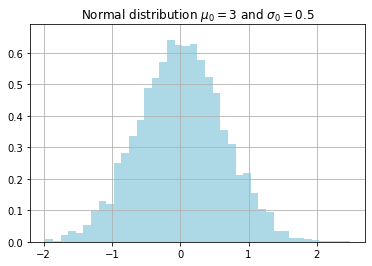

In [4]:
# Plot the data
Nbins = int(1 + 3.322*np.log2(N))
hx, hy, _ = plt.hist(x, bins=Nbins, density=1,color="lightblue")
plt.ylim(0.0,max(hx)+0.05)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()

Optimization terminated successfully.
         Current function value: 3885.557564
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3885.917361
         Iterations: 17
         Function evaluations: 34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


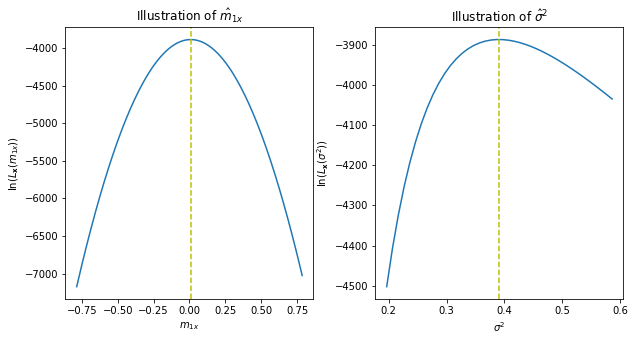

In [5]:
#   Plotting output for mu
rr = np.arange(μ-2*σ2, μ+2*σ2, 0.01)
rr2 = np.arange(σ2/2, 1.5*σ2, 0.01)
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
plt.subplots_adjust(wspace=.25,hspace=0)
axes[0].plot(rr, -negloglikemu(rr))
axes[0].set_xlabel('$m_{1x}$')
axes[0].set_ylabel('$\ln(L_{\mathbf{x}}(m_{1x}))$')

#   Optimizing the LogLikelyhood with Numerical Methods
from scipy.optimize import fmin
import math

#   Maximum likelihood estimates of mu and sigma2
mumin = fmin(negloglikemu,np.array([2]))
sigma2min = fmin(negloglike,np.array([2]))

#   plotted output for sigma
axes[0].axvline(x=mumin,linestyle='--', color='y')
axes[1].plot(rr2, -negloglike(rr2))
axes[0].set_title('Illustration of $\hat{m}_{1x}$')
axes[1].set_xlabel('$\sigma^2$')
axes[1].set_ylabel('$\ln(L_{\mathbf{x}}(\sigma^2))$')
axes[1].set_title('Illustration of $ \hat{\sigma}^2$')
axes[1].axvline(x=sigma2min,linestyle='--', color='y')
plt.savefig('loglike.eps', dpi=300, bbox_inches='tight')
plt.show()

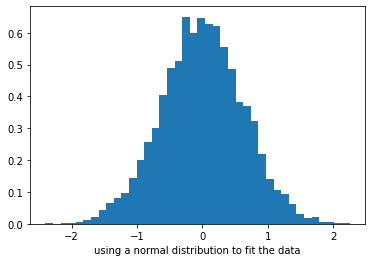

μ, σ2=  0.000840307652652127 0.624657962146412


In [26]:
# built-in fitting procedure  of  scipy.stats
# Fitting data to a distribution will find the pdf parameters  minimizing 
# the mean squared error between the data histogram and assumed distribution.
# https://www.adamsmith.haus/python/answers/how-to-fit-data-to-a-distribution-in-python
from scipy.stats import norm

data =  np.random.normal(μ, np.sqrt(σ2), N)
# using a normal distribution to fit the data
mean, var  = scipy.stats.distributions.norm.fit(data)

l = np.linspace(μ-1.5*σ2,μ-1.5*σ2,N) # axis 
fitted_data = scipy.stats.distributions.norm.pdf(l,mean, var)
plt.hist(data,bins=Nbins, density=True)
plt.xlabel('using a normal distribution to fit the data')
plt.plot(l,fitted_data,'r-')
plt.show()
print(f'μ, σ2= ',mean,var) 
# print(f'μ, σ2= ',norm.fit(x),mean,var) 
# Вернуться к оценке максимального правдоподобия